In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('CC GENERAL.csv').iloc[:,1:].dropna()

In [3]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [4]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [5]:
k_means=KMeans(init='k-means++', n_clusters=3, n_init=15)
no_labeled_data = data.iloc[:,:-1]
k_means.fit(data)

KMeans(n_clusters=3, n_init=15)

In [61]:
from sklearn import preprocessing
data = np.array(data, dtype='float') 
min_max_scaler = preprocessing.StandardScaler()
scaled_data = min_max_scaler.fit_transform(data)

In [7]:
clustering = DBSCAN().fit(scaled_data) 
print(f"Метки кластеров: {set(clustering.labels_)} \n") 
print(f"Количество кластеров: {len(set(clustering.labels_)) - 1} \n") 
print(f"Процент наблюдений, которые кластеризовать не удалось: {list(clustering.labels_).count(-1) / len(list(clustering.labels_))}")

Метки кластеров: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, -1} 

Количество кластеров: 36 

Процент наблюдений, которые кластеризовать не удалось: 0.7512737378415933


In [8]:
# 4.
clusters_count = []
cluster_percent = []
eps_for = []
for eps in range(1,11):
    eps_slash_100 = eps/5
    clustering2 = DBSCAN(eps=eps_slash_100).fit(scaled_data) 
    eps_for.append(eps_slash_100)
    clusters_count.append(len(set(clustering2.labels_)))  
    cluster_percent.append(list(clustering2.labels_).count(-1) / len(list(clustering2.labels_))) 

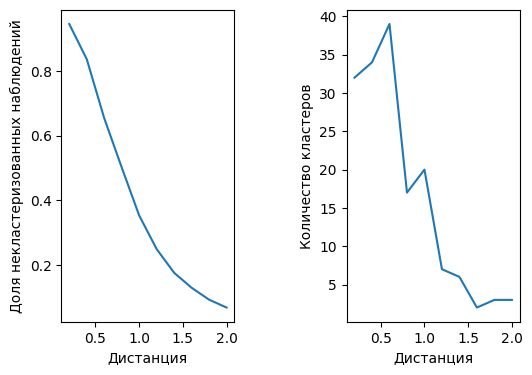

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.tight_layout(pad=5.0)

ax1.plot(eps_for, cluster_percent)
ax1.set(xlabel='Дистанция', ylabel='Доля некластеризованных наблюдений')


ax2.plot(eps_for, clusters_count)
ax2.set(xlabel='Дистанция', ylabel='Количество кластеров')

plt.show()

In [10]:
clusters_count = []
cluster_percent = []
min_samples_for = []
for min_s in range(1,30):
    clustering2 = DBSCAN(min_samples=min_s).fit(scaled_data) 
    min_samples_for.append(min_s)
    clusters_count.append(len(set(clustering2.labels_)))  
    cluster_percent.append(list(clustering2.labels_).count(-1) / len(list(clustering2.labels_))) 

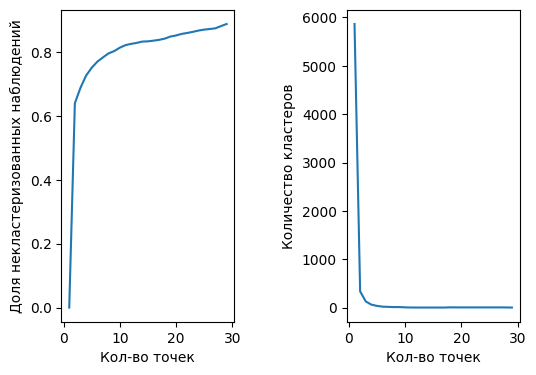

In [11]:
fig, (ax3, ax4) = plt.subplots(1, 2)
fig.tight_layout(pad=5.0)

ax3.plot(min_samples_for, cluster_percent)
ax3.set(xlabel='Кол-во точек', ylabel='Доля некластеризованных наблюдений')


ax4.plot(min_samples_for, clusters_count)
ax4.set(xlabel='Кол-во точек', ylabel='Количество кластеров')

plt.show()

In [12]:
clustering3 = DBSCAN(min_samples=3, eps=2).fit(scaled_data) 
labels = clustering3.labels_
print(f"Метки кластеров: {set(clustering3.labels_)} \n") 
print(f"Количество кластеров: {len(set(clustering3.labels_)) - 1} \n") 
print(f"Процент наблюдений, которые кластеризовать не удалось: {list(clustering3.labels_).count(-1) / len(list(clustering3.labels_))}")

Метки кластеров: {0, 1, 2, 3, 4, 5, -1} 

Количество кластеров: 6 

Процент наблюдений, которые кластеризовать не удалось: 0.06287633163501621


In [13]:
for eps in range(1,11):
    for min_samples in range(1,10):
        clustering3 = DBSCAN(min_samples=min_samples, eps=eps/5).fit(scaled_data) 
        if 5 <= len(set(clustering3.labels_)) - 1 <= 7 and list(clustering3.labels_).count(-1) / len(list(clustering3.labels_)) <= 0.12:
            eps_fin = eps/5
            min_s_fin = min_samples
            break

print
print(eps_fin)
print(min_s_fin)
print(len(set(clustering3.labels_)) - 1)
print(list(clustering3.labels_).count(-1) / len(list(clustering3.labels_)))

2.0
3
6
0.06287633163501621


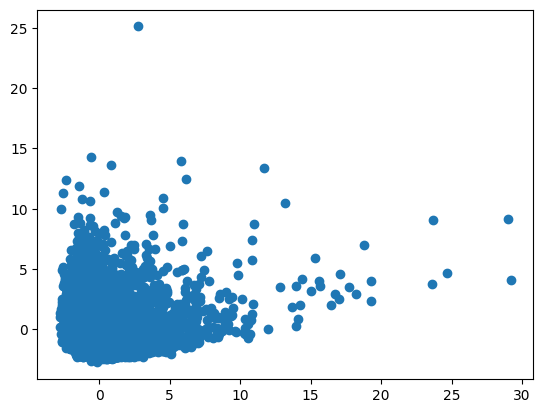

In [14]:
# 7. 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)
x=pca.transform(scaled_data)
plt.scatter(x[:,0], x[:,1])

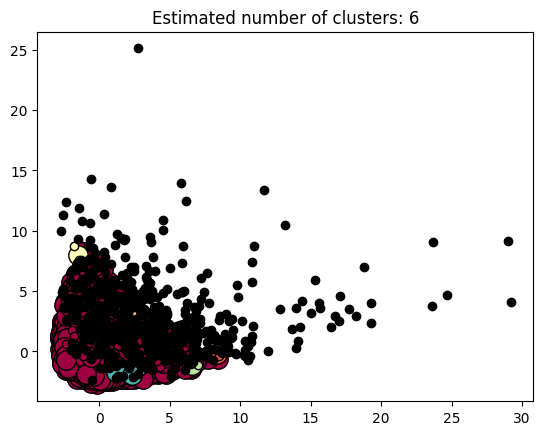

In [15]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[clustering3.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {len(set(clustering3.labels_)) - 1}")
plt.show()

In [16]:
# OPTICS

In [17]:
# 1.

In [66]:
# 2.
from sklearn.cluster import OPTICS
for min_samples in range(2,3):
    for eps in range(1,100,10):
        clustering4 = OPTICS(min_samples=min_samples, max_eps=eps).fit(scaled_data) 
        if 5 <= len(set(clustering4.labels_)) - 1 <= 7 and list(clustering4.labels_).count(-1) / len(list(clustering4.labels_)) <= 0.12:
            eps_fin = eps/5
            min_s_fin = min_samples
            break
        else:
            print(f'max_eps = {eps}')
            print(f'min_samples = {min_samples}')
            print(len(set(clustering4.labels_)) - 1)
            print(list(clustering4.labels_).count(-1) / len(list(clustering4.labels_)))
            print('------------'*2)

print(eps_fin)
print(min_s_fin)
print(len(set(clustering4.labels_)) - 1)
print(list(clustering4.labels_).count(-1) / len(list(clustering4.labels_)))

max_eps = 1
min_samples = 2
1417
0.5665817508105604
------------------------
max_eps = 11
min_samples = 2
1629
0.5024316813339509
------------------------
max_eps = 21
min_samples = 2
1629
0.5024316813339509
------------------------
max_eps = 31
min_samples = 2
1629
0.5024316813339509
------------------------
max_eps = 41
min_samples = 2
1629
0.5024316813339509
------------------------
max_eps = 51
min_samples = 2
1629
0.5024316813339509
------------------------
max_eps = 61
min_samples = 2
1629
0.5024316813339509
------------------------
max_eps = 71
min_samples = 2
1629
0.5024316813339509
------------------------
max_eps = 81
min_samples = 2
1629
0.5024316813339509
------------------------
max_eps = 91
min_samples = 2
1629
0.5024316813339509
------------------------
2.0
3
1629
0.5024316813339509


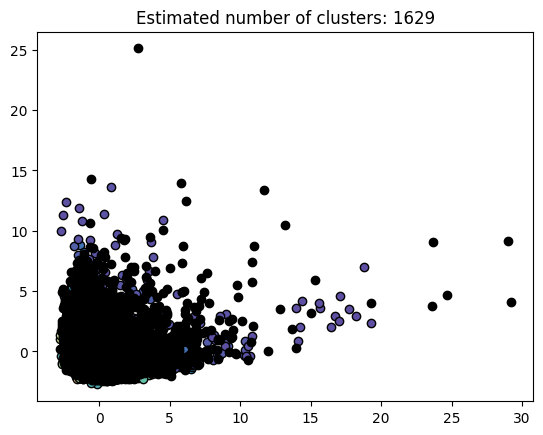

In [68]:
labels = clustering4.labels_
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
#core_samples_mask[clustering4.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {len(set(clustering4.labels_)) - 1}")
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1500 but corresponding boolean dimension is 8636

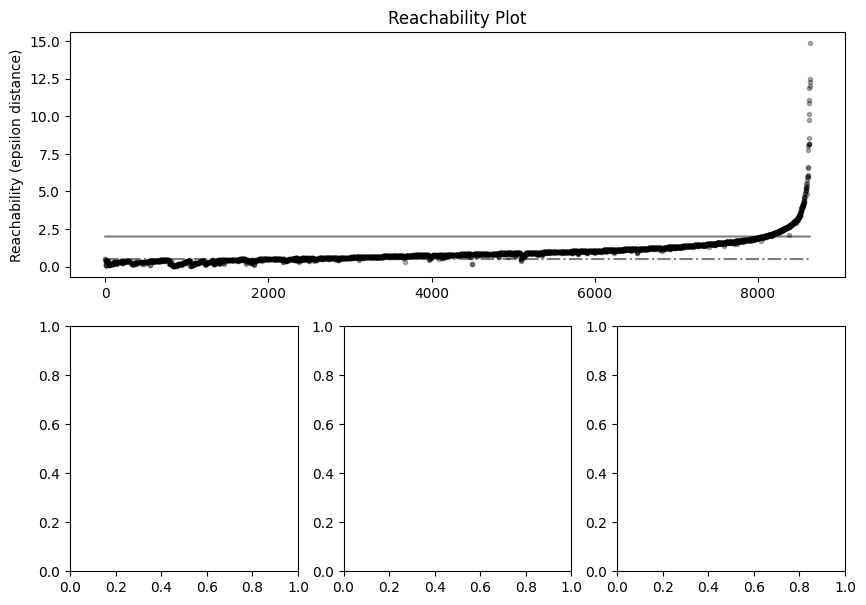

In [70]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import OPTICS, cluster_optics_dbscan

# Generate sample data

np.random.seed(0)
n_points_per_cluster = 250

C1 = [-5, -2] + 0.8 * np.random.randn(n_points_per_cluster, 2)
C2 = [4, -1] + 0.1 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + 0.2 * np.random.randn(n_points_per_cluster, 2)
C4 = [-2, 3] + 0.3 * np.random.randn(n_points_per_cluster, 2)
C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)
X = np.vstack((C1, C2, C3, C4, C5, C6))

clust = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05)

# Run the fit
clust.fit(X)

labels_050 = cluster_optics_dbscan(
    reachability=clustering4.reachability_,
    core_distances=clustering4.core_distances_,
    ordering=clustering4.ordering_,
    eps=0.5,
)
labels_200 = cluster_optics_dbscan(
    reachability=clustering4.reachability_,
    core_distances=clustering4.core_distances_,
    ordering=clustering4.ordering_,
    eps=2,
)

space = np.arange(len(scaled_data))
reachability = clustering4.reachability_[clustering4.ordering_]
labels = clustering4.labels_[clustering4.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in enumerate(colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

# OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in enumerate(colors):
    Xk = X[clustering4.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clustering4.labels_ == -1, 0], X[clustering4.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")

# DBSCAN at 0.5
colors = ["g.", "r.", "b.", "c."]
for klass, color in enumerate(colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], "k+", alpha=0.1)
ax3.set_title("Clustering at 0.5 epsilon cut\nDBSCAN")

# DBSCAN at 2.
colors = ["g.", "m.", "y.", "c."]
for klass, color in enumerate(colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], "k+", alpha=0.1)
ax4.set_title("Clustering at 2.0 epsilon cut\nDBSCAN")

plt.tight_layout()
plt.show()

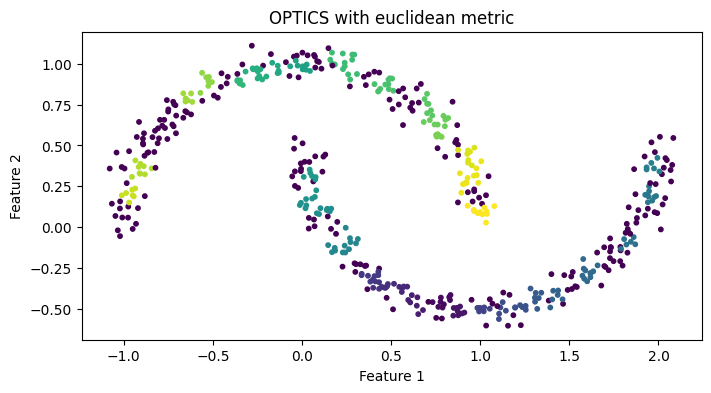

Число кластеров: 35


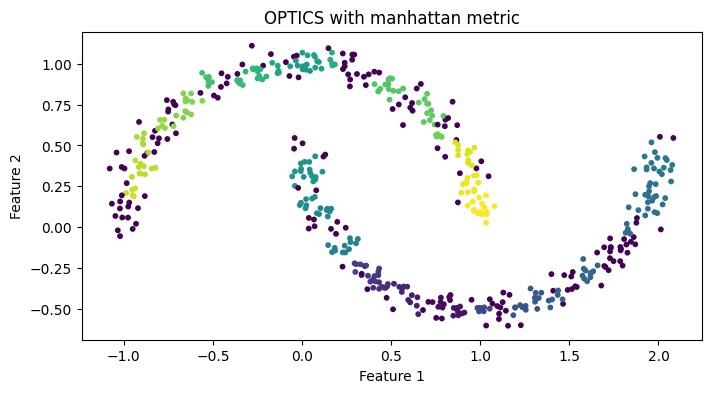

Число кластеров: 37


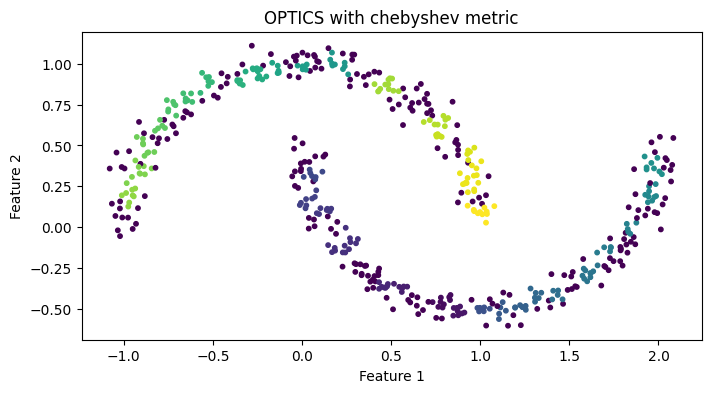

Число кластеров: 36


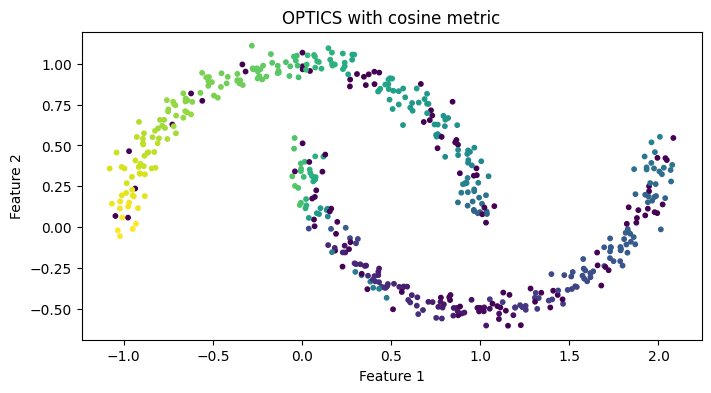

Число кластеров: 50


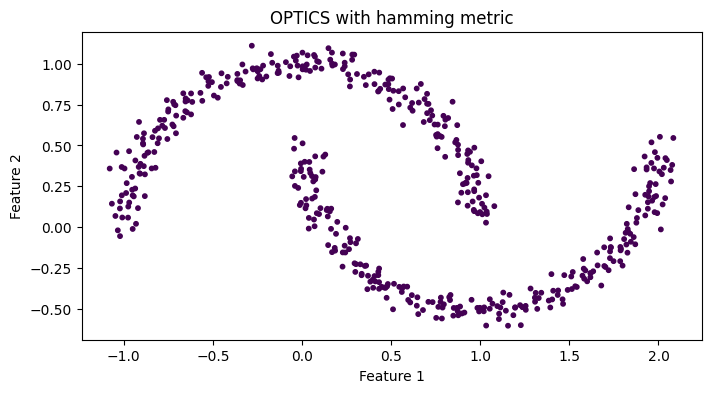

Число кластеров: 0


In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import OPTICS
from sklearn.metrics import pairwise_distances

# Генерация данных
X_moons, _ = make_moons(n_samples=500, noise=.05, random_state=42)

# Задаем метрики
metrics = ['euclidean', 'manhattan', 'chebyshev', 'cosine', 'hamming']

# Функция для визуализации
def plot_optics(X, metric):
    optics = OPTICS(metric=metric)
    labels = optics.fit_predict(X)
    plt.figure(figsize=(8, 4))
    plt.title(f'OPTICS with {metric} metric')
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    print(f'Число кластеров: {len(set(labels))-1}')

# Визуализация для разных метрик на данных make_moons
for metric in metrics:
    plot_optics(X_moons, metric)